# Analysis of Road Accidents in the UK

## Casualty Dataset

In [17]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use("classic")

In [18]:
# # read data
# cas_df = pd.read_csv("./data/working_sets/final_cas_dataset.csv", low_memory=False, index_col=False)

In [19]:
# # pickle data to save (dump)
# with open("./data/working_sets/casualty_data.pkl", "wb") as f: # wb = write binary
#     pickle.dump(cas_df, f)

In [38]:
# import data from pkl file
# load pickled data
with open("./data/working_sets/casualty_data.pkl", "rb") as f:
    cas = pickle.load(f)

## Data Preparation

In [39]:
# drop rows with negative values (as this is missing data)
no_negs = cas.loc[ ~(cas.iloc[:,2:].isin([-1]).any(axis=1))]

In [40]:
# get balanced random sample

size = 10000        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
cas = cas.groupby('casualty_severity', as_index=False).apply(fn)
cas.reset_index(drop=True, inplace=True) # reset index

In [41]:
cas.head()

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,...,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,acc_veh_id,vehicle_type,propulsion_code,age_band_of_driver,acc_veh_cas_ref,adjusted_slight
0,2014120216735,1,1,3,1,50,8,1,5,2,...,1,1,2,1,2014120216735_1,9,1,9,2014120216735_1_1,NaN
1,2013521304134,2,2,1,2,42,7,1,0,0,...,1,1,2,1,2013521304134_2,5,1,7,2013521304134_2_2,NaN
2,2017230182199.0,1,1,1,1,21,5,1,0,0,...,1,1,2,1,2017230182199.0_1,9,1,5,2017230182199.0_1_1,NaN
3,2014160B03441,2,1,1,1,44,7,1,0,0,...,1,1,2,1,2014160B03441_2,5,1,7,2014160B03441_2_1,NaN
4,2019520901822.0,1,1,3,2,79,11,1,5,9,...,5,2,2,1,2019520901822.0_1,9,1,11,2019520901822.0_1_1,NaN


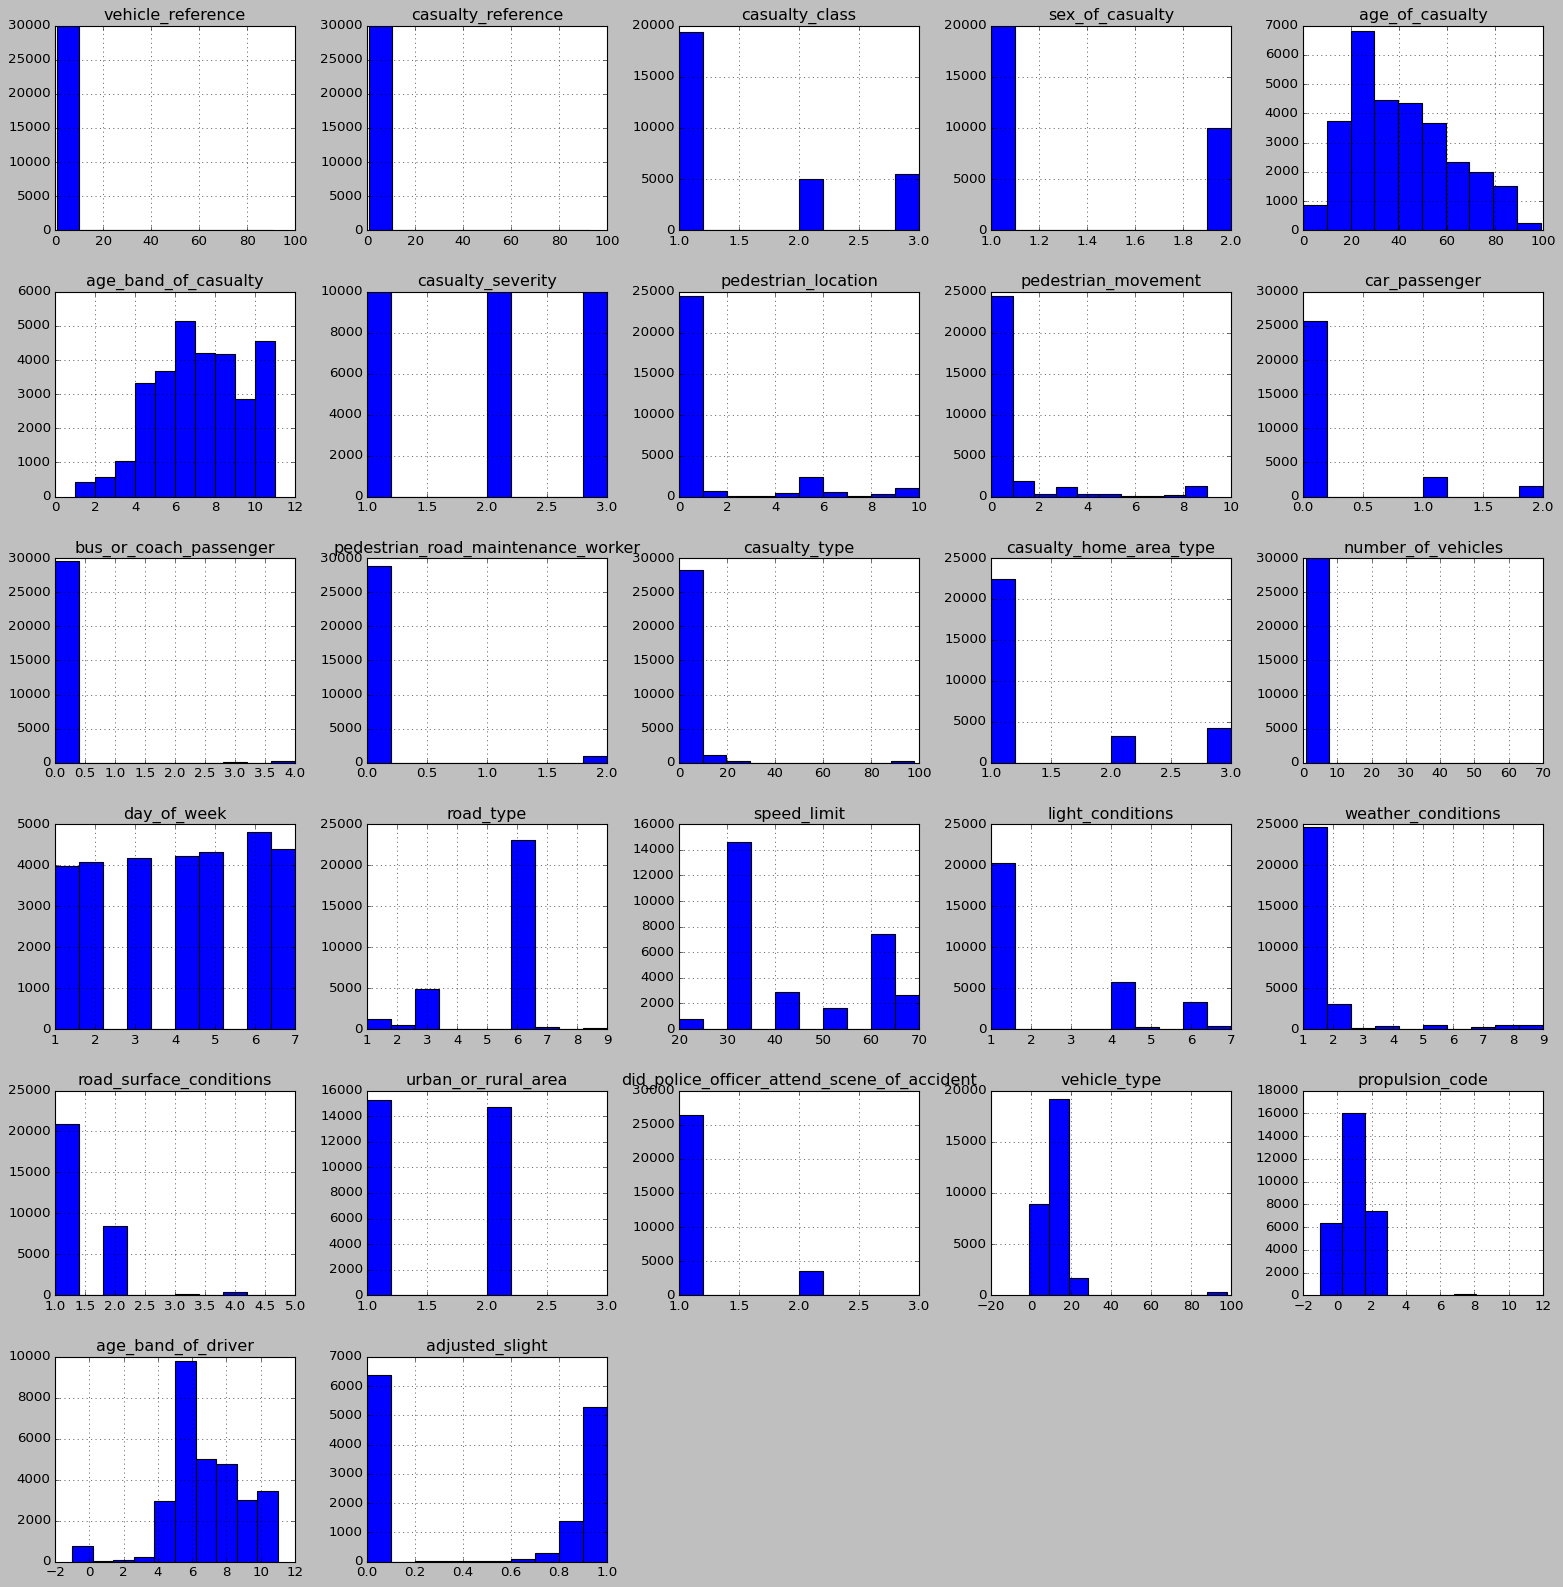

In [42]:
prep = cas.copy()

initial_hist = prep.hist(figsize = (24,24))

In [25]:
cas.describe()

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,...,speed_limit,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,vehicle_type,propulsion_code,age_band_of_driver,adjusted_slight
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,13452.000000
mean,1.374567,1.329100,1.543233,1.332733,40.449700,6.759633,2.00000,1.012933,0.750433,0.20220,...,42.921333,2.24880,1.491300,1.333467,1.495367,1.122000,8.751633,0.860400,6.726267,0.489989
std,0.921717,0.928774,0.785505,0.471200,21.085941,2.377627,0.81651,2.395570,2.086950,0.51529,...,15.367726,1.89925,1.502797,0.572082,0.499987,0.329727,9.101343,1.160987,2.323012,0.467200
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.00000,...,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,1.00000,0.000000,0.000000,0.00000,...,30.000000,1.00000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,37.000000,7.000000,2.00000,0.000000,0.000000,0.00000,...,30.000000,1.00000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,7.000000,0.791665
75%,2.000000,1.000000,2.000000,2.000000,55.000000,8.000000,3.00000,0.000000,0.000000,0.00000,...,60.000000,4.00000,1.000000,2.000000,2.000000,1.000000,9.000000,2.000000,8.000000,0.957197
max,91.000000,63.000000,3.000000,2.000000,99.000000,11.000000,3.00000,10.000000,9.000000,2.00000,...,70.000000,7.00000,9.000000,5.000000,2.000000,3.000000,98.000000,12.000000,11.000000,1.000000


In [16]:
cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211048 entries, 0 to 1211047
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   accident_index                               1211048 non-null  object 
 1   vehicle_reference                            1211048 non-null  int64  
 2   casualty_reference                           1211048 non-null  int64  
 3   casualty_class                               1211048 non-null  int64  
 4   sex_of_casualty                              1211048 non-null  int64  
 5   age_of_casualty                              1211048 non-null  int64  
 6   age_band_of_casualty                         1211048 non-null  int64  
 7   casualty_severity                            1211048 non-null  int64  
 8   pedestrian_location                          1211048 non-null  int64  
 9   pedestrian_movement                          1

In [26]:
cas.nunique()

accident_index                                 25893
vehicle_reference                                 10
casualty_reference                                19
casualty_class                                     3
sex_of_casualty                                    2
age_of_casualty                                   99
age_band_of_casualty                              11
casualty_severity                                  3
pedestrian_location                               11
pedestrian_movement                               10
car_passenger                                      3
bus_or_coach_passenger                             5
pedestrian_road_maintenance_worker                 3
casualty_type                                     21
casualty_home_area_type                            3
number_of_vehicles                                13
date                                            3278
day_of_week                                        7
time                                          

## Preparation

In [31]:
no_negs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23357 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               23357 non-null  object 
 1   vehicle_reference                            23357 non-null  int64  
 2   casualty_reference                           23357 non-null  int64  
 3   casualty_class                               23357 non-null  int64  
 4   sex_of_casualty                              23357 non-null  int64  
 5   age_of_casualty                              23357 non-null  int64  
 6   age_band_of_casualty                         23357 non-null  int64  
 7   casualty_severity                            23357 non-null  int64  
 8   pedestrian_location                          23357 non-null  int64  
 9   pedestrian_movement                          23357 non-null  int64  
 10

### Remove Columns

In [36]:
drop_cols = ["accident_index", "vehicle_reference", "casualty_reference", "pedestrian_location", 
             "pedestrian_movement", "car_passenger", "bus_or_coach_passenger",
             "pedestrian_road_maintenance_worker", "adjusted_slight"]

In [ ]:
drops = 

### Datatypes

In [ ]:
cats = ["casualty_class", "sex_of_casualty", "age_band_of_casualty", "pedestrian"]